# DIFFERENT MACHINE LEARNING MODELS FOR CUISINE IDENTIFICATION

In [209]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [210]:
datatrain = pd.read_json("./train.json")

Sense we want to vectorizer the ingredients we need to be able to call string functions on them.
In particular you will not be able to call tolower() because the data will be by default a list.

In [211]:
datatrain['_ingredients'] = datatrain['ingredients'].map(";".join)
datatest['_ingredients'] = datatest['ingredients'].map(";".join)
datatop = datatrain.head()
datatop

,cuisine,id,ingredients,_ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce;black olives;grape tomatoes;ga...
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour;ground pepper;salt;tomatoes;ground...
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs;pepper;salt;mayonaise;cooking oil;green c...
3,indian,22213,"[water, vegetable oil, wheat, salt]",water;vegetable oil;wheat;salt
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",black pepper;shallots;cornflour;cayenne pepper...


Convert a collection of text documents to a matrix of token counts

In [212]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [213]:
X = cv.fit_transform(datatrain['_ingredients'].values)

In [214]:
print(X.shape)

(39774, 3051)


In [215]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [216]:
y = datatrain.cuisine.values

Now we need to train out data. We split the train and the test size by .20 which is usually the standard.

In [217]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20)

Uses a type of regulaization is called ridge regression. Which adds a squared value of the coefficent as penality for the loss function. This solver uses Coordinate descent which is an optimization algorithm that successively minimizes along coordinate directions to find the minimum of a function. At each iteration, the algorithm determines a coordinate or coordinate block via a coordinate selection rule, then exactly or inexactly minimizes over the corresponding coordinate hyperplane while fixing all other coordinates or coordinate blocks. A line search along the coordinate direction can be performed at the current iterate to determine the appropriate step size. Coordinate descent is applicable in both differentiable and derivative-free contexts. 

In [218]:
start = time.time()
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty = 'l2', multi_class = 'ovr', solver='liblinear')
classifier.fit(X_train, y_train)
end = time.time()
print(end - start)

12.59287977218628


Lets test its accuracy against the test data.

In [219]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
print(f'Validation classification accuracy: {accuracy_score(y_test, y_pred)}')

Validation classification accuracy: 0.7906976744186046


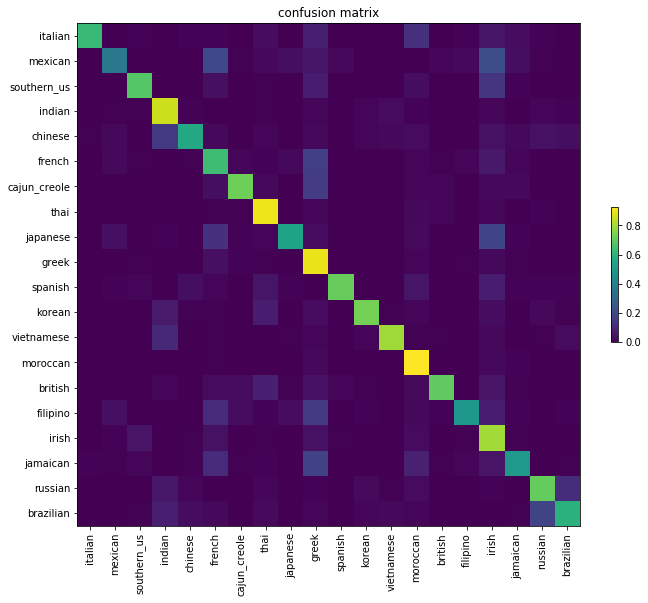

In [220]:
plt.figure(figsize=(10, 10))
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.imshow(cm_normalized, interpolation='nearest')
plt.title("confusion matrix")
plt.colorbar(shrink=0.2)
cuisines = datatrain['cuisine'].value_counts().index
tick_marks = np.arange(len(cuisines))
plt.xticks(tick_marks, cuisines, rotation=90)
plt.yticks(tick_marks, cuisines)
plt.tight_layout()

Limited-memory Broyden–Fletcher–Goldfarb–Shanno Algorithm. Hessian matrix is approximated using updates 
specified by gradient evaluations (or approximate gradient evaluations). To form an approximation of the
Hessian Matrix.


In [221]:
start = time.time()
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty = 'l2', multi_class = 'auto', solver='lbfgs', max_iter = 400)
classifier.fit(X_train, y_train)
end = time.time()
print(end - start)

21.2461519241333


In [222]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
print(f'Validation classification accuracy: {accuracy_score(y_test, y_pred)}')

Validation classification accuracy: 0.7849151477058454


Stochastic gradient descent (often shortened to SGD), also known as incremental gradient descent, 
is an iterative method for optimizing a differentiable objective function, a stochastic approximation 
of gradient descent optimization.

In [224]:
start = time.time()
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty = 'l2', multi_class = 'auto', solver='sag', max_iter = 400)
classifier.fit(X_train, y_train)
end = time.time()
print(end - start)

20.23078966140747


In [195]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
print(f'Validation classification accuracy: {accuracy_score(y_test, y_pred)}')

Validation classification accuracy: 0.7730986800754243
